In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), 
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

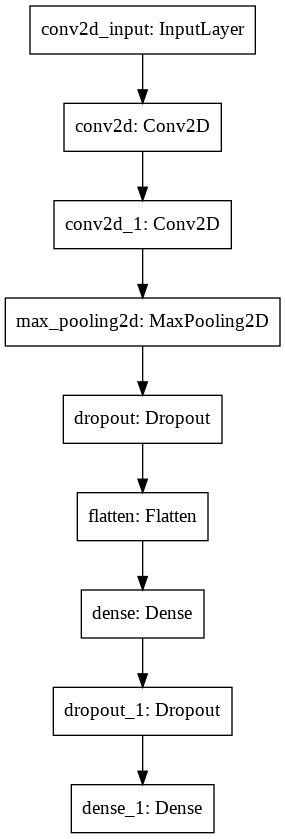

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
!ls -l

total 32
drwxr-xr-x 2 root root  4096 Feb  8 06:49 model
-rw-r--r-- 1 root root 23744 Feb  8 06:49 model.png
drwxr-xr-x 1 root root  4096 Feb  4 15:26 sample_data


In [10]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [11]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30,
                    batch_size=200, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
240/240 [==============================] - 113s 468ms/step - loss: 0.6057 - accuracy: 0.8101 - val_loss: 0.0748 - val_accuracy: 0.9786

Epoch 00001: val_loss improved from inf to 0.07478, saving model to ./model/mnist-cnn-01-0.0748.hdf5
Epoch 2/30
240/240 [==============================] - 112s 465ms/step - loss: 0.1047 - accuracy: 0.9681 - val_loss: 0.0534 - val_accuracy: 0.9848

Epoch 00002: val_loss improved from 0.07478 to 0.05336, saving model to ./model/mnist-cnn-02-0.0534.hdf5
Epoch 3/30
240/240 [==============================] - 112s 466ms/step - loss: 0.0685 - accuracy: 0.9799 - val_loss: 0.0447 - val_accuracy: 0.9868

Epoch 00003: val_loss improved from 0.05336 to 0.04475, saving model to ./model/mnist-cnn-03-0.0447.hdf5
Epoch 4/30
240/240 [==============================] - 111s 464ms/step - loss: 0.0599 - accuracy: 0.9804 - val_loss: 0.0392 - val_accuracy: 0.9890

Epoch 00004: val_loss improved from 0.04475 to 0.03922, saving model to ./model/mnist-cnn-04-0.0392.h

In [23]:
!ls model

mnist-cnn-01-0.0748.hdf5  mnist-cnn-03-0.0447.hdf5  mnist-cnn-07-0.0363.hdf5
mnist-cnn-02-0.0534.hdf5  mnist-cnn-04-0.0392.hdf5  mnist-cnn-16-0.0361.hdf5


In [25]:
from keras.models import load_model
del model
model = load_model('model/mnist-cnn-16-0.0361.hdf5')

In [26]:
# 테스트 정확도 출력 
acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Test Accuracy:{acc:.4f}")

Test Accuracy:0.9920


In [27]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

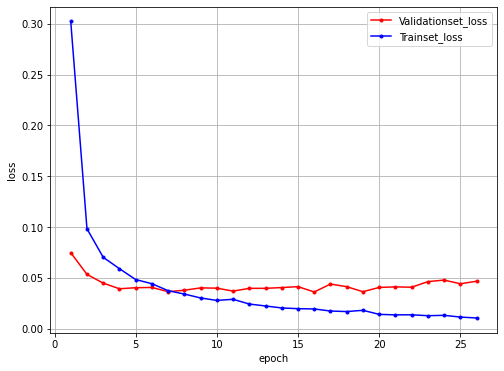

In [28]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### GPU

In [29]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14747357879335845010
]


In [30]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

